In [ ]:
# Larval Zebra Fish Connectome
# Guide of this notebook:
    # Part 1:
        # First we start by visualizing some neurons from zebra fish in 2D and 3D
        # Plot all the Zebra Fish neurons with colors on top of brain wireframe
        # Calculate soma to further point and visualize
        # Calculate inputs/outputs list based on above idea (soma to furthest) and visualize
        # Divide the brain into a grid
        # Plot the connectivity map of the grid
    # Part 2:
        # Define the brain regions existing in Zebra Fish with different properties such as point of origin, color, mesh
        # Plot regions as approximated spheres for faster compute
        # Plot all the regions in a 3D view against a background wireframe image
        # Compute connectivity matrix (code is commented for computing conn matrix from approximated volume size - connectivity matrix less accurate)
        # Perform hierarchical clustering and highlight the regions on the re-sorted connectivity map

In [1]:
# Installing neurom
import numpy as np
import matplotlib.pyplot as plt
import os

!pip install neurom
import neurom as nm
from neurom.view.matplotlib_impl import plot_morph

def figure():
    fig, ax = plt.subplots(figsize=[6, 8], sharex=True, sharey=True)
    ax.set_aspect('equal')
    ax.axis("off")
    plt.gca().invert_yaxis()

    return fig, ax

In [2]:
# provide path to the data folder
folder_path = "./Aligned/Original"

# If on Google Colab
# !wget https://api.mapzebrain.org/media/downloads/Neurons/mapZebrain__neurons.zip
# !unzip /content/mapZebrain__neurons.zip
# folder_path = "/content/Aligned/Original"

In [3]:
# Filtering and loading the data
neuron_paths = []
for file in os.listdir(folder_path):
    neuron_path = folder_path + '/' + file

    try:
        m = nm.load_morphology(neuron_path) # try to load the morphology
        neuron_paths.append(neuron_path) # if this works appened the path to neuron_paths
    except:
        pass # otherwise just skip this neuron

print("Loaded " + str(len(neuron_paths)) + " of " + str(len(os.listdir(folder_path))) + " neurons.")


./Aligned/Original/FT_T_maG_7.swc:2462:warning

./Aligned/Original/FT_T_maG_7.swc:2461:warning

./Aligned/Original/FT_T_maG_7.swc:2460:warning

./Aligned/Original/FT_T_maG_7.swc:2459:warning

./Aligned/Original/FT_T_maG_7.swc:2458:warning

./Aligned/Original/FT_T_maG_7.swc:2457:warning

./Aligned/Original/FT_T_maG_7.swc:2456:warning

./Aligned/Original/FT_T_maG_7.swc:2455:warning

./Aligned/Original/FT_T_maG_7.swc:2454:warning

./Aligned/Original/FT_T_maG_7.swc:2453:warning

./Aligned/Original/FT_T_maG_7.swc:2452:warning

./Aligned/Original/FT_T_maG_7.swc:2451:warning

./Aligned/Original/FT_T_maG_7.swc:2450:warning

./Aligned/Original/FT_T_maG_7.swc:2449:warning

./Aligned/Original/FT_T_maG_7.swc:2448:warning

./Aligned/Original/FT_T_maG_7.swc:2447:warning

./Aligned/Original/FT_T_maG_7.swc:2446:warning

./Aligned/Original/FT_T_maG_7.swc:2445:warning

./Aligned/Original/FT_T_maG_7.swc:2444:warning

./Aligned/Original/FT_T_maG_7.swc:2443:warning

./Aligned/Original/FT_T_maG_7.swc:2442:

Loaded 3175 of 4327 neurons.


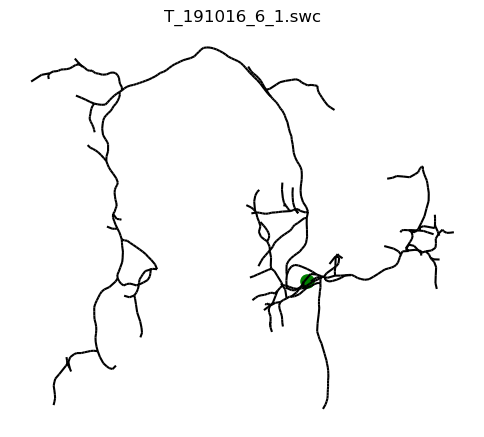

In [4]:
# Plotting single neurons in 2d 
n = np.random.randint(low=0, high=len(neuron_paths)) # sample a random neuron
m = nm.load_morphology(neuron_paths[n]) # load it's morphology

fig, ax = figure()
plot_morph(m,ax=ax, soma_outline=0, plane='xy', diameter_scale=None, linewidth=1.5, color='k', alpha=1.0)
#plt.scatter(m.points[:,0], m.points[:,1], color='xkcd:grey')
plt.scatter(m.soma.center[0], m.soma.center[1], s=90, color='g')

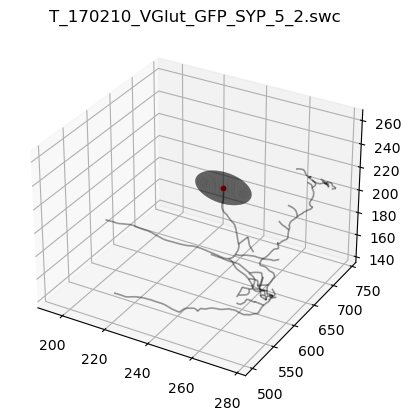

In [5]:
# Plotting a Neuron in 3D
from neurom.view.matplotlib_impl import plot_morph3d

fig = plt.figure()
ax = plt.axes(projection='3d')
plot_morph3d(m, ax=ax, color='k', alpha=0.4, diameter_scale=None, linewidth=1.2)
ax.scatter(m.soma.center[0], m.soma.center[1], m.soma.center[2], s=10, color='r')

In [5]:
# Load wireframe image for zebrafish brain
from matplotlib.image import imread
bg_image = imread('zebra-fish-bg.png')

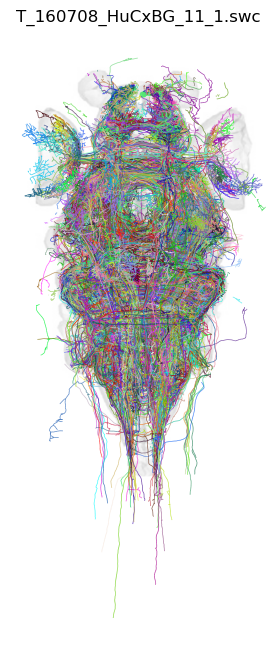

In [6]:
# Plot all the Zebra Fish neurons on top of the wireframe of the brain
import random

def random_color():
  return "#{:06x}".format(random.randint(0, 0xFFFFFF))

fig, ax = figure()
left, right, bottom, top = 30, 550, 980, 60
ax.imshow(bg_image, extent=[left, right, bottom, top])
for i, path in enumerate(neuron_paths):
  currentPath = path
  m = nm.load_morphology(currentPath)

  try:
    color = random_color()
    plot_morph(m,ax=ax, soma_outline=0, plane='xy', diameter_scale=None, color=color, linewidth=0.5, alpha=0.8)
    #plt.scatter(m.points[:,0], m.points[:,1], color=color)
    #plt.scatter(m.soma.center[0], m.soma.center[1], s=1, color=color)
  except ValueError as e:
    print(f"An error occurred with neuron: {e}")
    pass

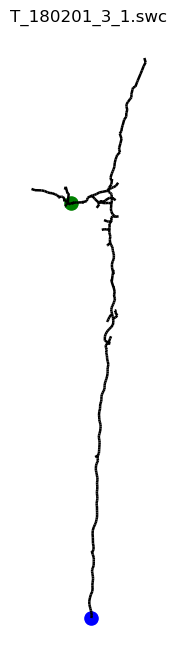

In [7]:
# Input to output neuron (soma to furthest)
# Define the output point for a single neuron
n = np.random.randint(low=0, high=len(neuron_paths))
m = nm.load_morphology(neuron_paths[n])

import math

def distance_3d(point1, point2):
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2 + (point2[2] - point1[2])**2)

max_distance = float("-inf")
max_output = m.soma.center

for point in m.points:
  distance = distance_3d(point, m.soma.center)
  if (distance > max_distance):
    max_distance = distance
    max_output = point

# Check that this seems to work by plotting some data
fig, ax = figure()
plot_morph(m,ax=ax, soma_outline=0, plane='xy', diameter_scale=None, linewidth=1.8, color='k', alpha=1.0)
plt.scatter(max_output[0], max_output[1], s=90, color='b')
plt.scatter(m.soma.center[0], m.soma.center[1], s=90, color='g')

In [8]:
# Calculate inputs / outputs lists - where inputs are the somas center and outputs furthest point
inputs, outputs = [], []

for i, path in enumerate(neuron_paths):
  try:
    currentPath = path
    m = nm.load_morphology(currentPath)

    max_distance = float("-inf")
    max_output = m.soma.center

    for point in m.points:
      distance = distance_3d(point, m.soma.center)
      if (distance > max_distance):
        max_distance = distance
        max_output = point

    inputs.append(m.soma.center)
    outputs.append(max_output)
  except:
    pass

assert len(inputs) == len(outputs)

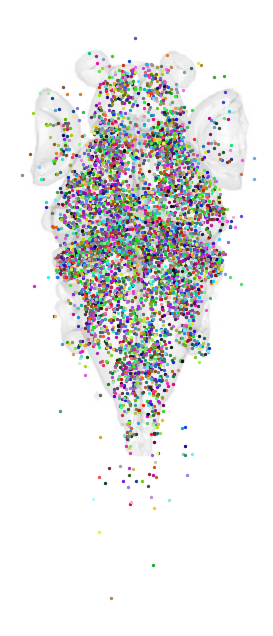

In [9]:
# Visualize input to output as scatter plot
import random

def random_color():
  return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# Plot all of the neurons together in line form (input-output point)
fig, ax = figure()
ax.imshow(bg_image, extent=[left, right, bottom, top])  # Set the extent to match the actual size of your plot

for i, v in enumerate(inputs):
  p1 = inputs[i]
  p2 = outputs[i]
  # Define your points
  point1 = (p1[0], p1[1], p1[2])
  point2 = (p2[0], p2[1], p2[2])
  color = random_color()

  # Draw a line between point1 and point2
  #ax.plot([point1[0], point2[0]], [point1[1], point2[1]], color=color, linewidth=0.5)

  # Optionally, you can add markers for the points themselves
  ax.scatter([point1[0], point2[0]], [point1[1], point2[1]], color=color, s=2)


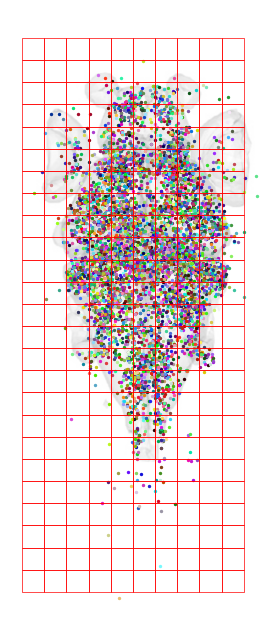

In [10]:
# Divide the brain into a 3d grid
import numpy as np
import random
import matplotlib.patches as patches

def random_color():
  return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# think about cell size
cell_size = 50

max_X = float("-inf")
max_Y = float("-inf")
max_Z = float("-inf")

# find maximum for each dimension to know the size of the grid
for i, v in enumerate(inputs):
  input = inputs[i]
  output = outputs[i]
  if input[0] > max_X:
    max_X = input[0]
  if input[1] > max_Y:
    max_Y = input[1]
  if input[2] > max_Z:
    max_Z = input[2]

  if output[0] > max_X:
    max_X = output[0]
  if output[1] > max_Y:
    max_Y = output[1]
  if output[2] > max_Z:
    max_Z = output[2]

x_dim = int(max_X / cell_size)
y_dim = int(max_Y / cell_size)
z_dim = int(max_Z / cell_size)

threeDBrain = np.zeros((x_dim, y_dim, z_dim))

num_voxels = x_dim * y_dim
connectivityMatrix = np.zeros((num_voxels, num_voxels))

def voxel_to_index(x, y, x_dim):
    return y * x_dim + x

for i, v in enumerate(inputs):
  input = inputs[i]
  output = outputs[i]

  i_x = int(input[0]/cell_size) - 1
  i_y = int(input[1]/cell_size) - 1
  i_z = int(input[2]/cell_size) - 1

  threeDBrain[i_x, i_y, i_z] += 1

  o_x = int(output[0]/cell_size) - 1
  o_y = int(output[1]/cell_size) - 1
  o_z = int(output[2]/cell_size) - 1

  threeDBrain[o_x, o_y, o_z] += 1

  input_idx = voxel_to_index(i_x, i_y, x_dim)
  output_idx = voxel_to_index(o_x, o_y, x_dim)

  connectivityMatrix[input_idx][output_idx] += 1

fig, ax = figure()
ax.imshow(bg_image, extent=[left, right, bottom, top])

# draw the input,output so we can overlap over the cells
for i, v in enumerate(inputs):
  p1 = inputs[i]
  p2 = outputs[i]

  point1 = (p1[0], p1[1], p1[2])
  point2 = (p2[0], p2[1], p2[2])
  color = random_color()

  ax.scatter([point1[0], point2[0]], [point1[1], point2[1]], color=color, s=2)

#Iterate over the range of the dimensions
for i in range(x_dim):
    for j in range(y_dim):
        # Calculate the bottom-left corner of each cell
        lower_left_x = i * cell_size
        lower_left_y = j * cell_size

        rect = patches.Rectangle((lower_left_x, lower_left_y), cell_size, cell_size, linewidth=0.5, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

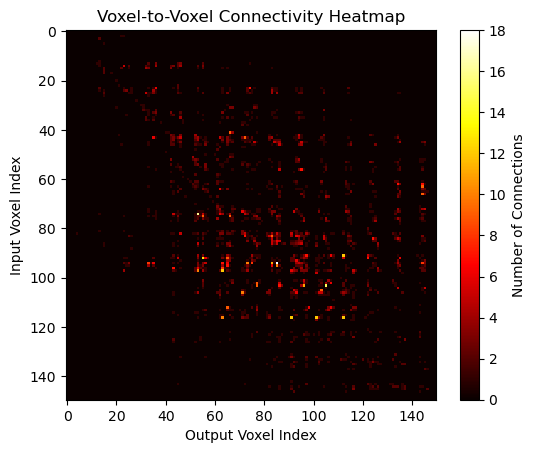

In [11]:
# Plot a connectivity matrix for the above 3D grid, later we will improve it
fig, ax = plt.subplots()

# Create the heatmap
cax = ax.imshow(connectivityMatrix[:150, :150], vmin=0, vmax=18, cmap='hot', interpolation='nearest')

# Add a color bar
cbar = fig.colorbar(cax)
cbar.set_label('Number of Connections')

# Add labels and title
ax.set_xlabel('Output Voxel Index')
ax.set_ylabel('Input Voxel Index')
ax.set_title('Voxel-to-Voxel Connectivity Heatmap')

# Show the plot
plt.show()

In [12]:
# Split the brain data by using the location provided by the Celullar-Resolution Atlas of the Larval Zebra Fish
# Define brain regions without morphology

# First define and parse the JSON structure for parts
import json

regions_json = '''
  [{
    "name": "L_Thalamus",
    "x": "220",
    "y": "312",
    "z": "179",
    "abbr": "th",
    "vol": "984842",
    "meshFilename": "meshes/L_Thalamus.stl",
    "color": "#809D9E"
  }, {
    "name": "L_Torus semicircularis",
    "x": "126",
    "y": "433",
    "z": "157",
    "abbr": "ts",
    "vol": "450263",
    "meshFilename": "meshes/L_Torus semicircularis.stl",
    "color": "#954F4F"
  }, {
    "name": "L_Tegmentum",
    "x": "199",
    "y": "436",
    "z": "188",
    "abbr": "t",
    "vol": "683361",
    "meshFilename": "meshes/L_Tegmentum.stl",
    "color": "#A99D58"
  }, {
    "name": "L_Medulla Oblongata strip 1",
    "x": "243",
    "y": "640",
    "z": "245",
    "abbr": "mos1",
    "vol": "601111",
    "meshFilename": "meshes/L_Medulla Oblongata strip 1.stl",
    "color": "#747364"
  }, {
    "name": "R_Thalamus",
    "x": "345",
    "y": "311",
    "z": "179",
    "abbr": "Th",
    "vol": "946196",
    "meshFilename": "meshes/R_Thalamus.stl",
    "color": "#809D9E"
  }, {
    "name": "R_Torus semicircularis",
    "x": "440",
    "y": "431",
    "z": "157",
    "abbr": "TS",
    "vol": "455121",
    "meshFilename": "meshes/R_Torus semicircularis.stl",
    "color": "#954F4F"
  }, {
    "name": "R_Tegmentum",
    "x": "370",
    "y": "435",
    "z": "188",
    "abbr": "T",
    "vol": "676192",
    "meshFilename": "meshes/R_Tegmentum.stl",
    "color": "#A99D58"
  }, {
    "name": "R_Medulla Oblongata strip 1",
    "x": "327",
    "y": "641",
    "z": "245",
    "abbr": "MOS1",
    "vol": "691010",
    "meshFilename": "meshes/R_Medulla Oblongata strip 1.stl",
    "color": "#747364"
  }, {
    "name": "R_Medulla Oblongata strip 5",
    "x": "349",
    "y": "691",
    "z": "286",
    "abbr": "MOS5",
    "vol": "567318",
    "meshFilename": "meshes/R_Medulla Oblongata strip 5.stl",
    "color": "#6F64B8"
  }, {
    "name": "L_Medulla Oblongata strip 4",
    "x": "216",
    "y": "686",
    "z": "209",
    "abbr": "mos4",
    "vol": "341466",
    "meshFilename": "meshes/L_Medulla Oblongata strip 4.stl",
    "color": "#4E3F78"
  }, {
    "name": "R_Medulla Oblongata strip 4",
    "x": "353",
    "y": "686",
    "z": "281",
    "abbr": "MOS4",
    "vol": "529316",
    "meshFilename": "meshes/R_Medulla Oblongata strip 4.stl",
    "color": "#4E3F78"
  }, {
    "name": "L_Medulla Oblongata strip 5",
    "x": "220",
    "y": "694",
    "z": "286",
    "abbr": "mos5",
    "vol": "559564",
    "meshFilename": "meshes/L_Medulla Oblongata strip 5.stl",
    "color": "#6F64B8"
  }, {
    "name": "L_Medial octavolateral nucleus",
    "x": "187",
    "y": "611",
    "z": "292",
    "abbr": "mon",
    "vol": "457585",
    "meshFilename": "meshes/L_Medial octavolateral nucleus.stl",
    "color": "#7B9478"
  }, {
    "name": "R_Medial octavolateral nucleus",
    "x": "384",
    "y": "612",
    "z": "292",
    "abbr": "MON",
    "vol": "461773",
    "meshFilename": "meshes/R_Medial octavolateral nucleus.stl",
    "color": "#7B9478"
  }, {
    "name": "R_Cerebellum",
    "x": "383",
    "y": "507",
    "z": "260",
    "abbr": "Ce",
    "vol": "1139670",
    "meshFilename": "meshes/R_Cerebellum.stl",
    "color": "#817E9B"
  }, {
    "name": "L_Cerebellum",
    "x": "187",
    "y": "504",
    "z": "260",
    "abbr": "ce",
    "vol": "1087593",
    "meshFilename": "meshes/L_Cerebellum.stl",
    "color": "#817E9B"
  }, {
    "name": "R_Pretectum",
    "x": "352",
    "y": "325",
    "z": "221",
    "abbr": "Pr",
    "vol": "422166",
    "meshFilename": "meshes/R_Pretectum.stl",
    "color": "#7FC994"
  }, {
    "name": "L_Pretectum",
    "x": "214",
    "y": "325",
    "z": "221",
    "abbr": "pr",
    "vol": "439624",
    "meshFilename": "meshes/L_Pretectum.stl",
    "color": "#7FC994"
  }, {
    "name": "R_Intermediate hypothalamus",
    "x": "357",
    "y": "416",
    "z": "96",
    "abbr": "Hi",
    "vol": "1032515",
    "meshFilename": "meshes/R_Intermediate hypothalamus.stl",
    "color": "#C9795D"
  }, {
    "name": "R_Interpeduncular nucleus",
    "x": "263",
    "y": "483",
    "z": "140",
    "abbr": "Nln",
    "vol": "94691",
    "meshFilename": "meshes/R_Interpeduncular nucleus.stl",
    "color": "#C9795D"
  }, {
    "name": "R_Caudal hypothalamus",
    "x": "340",
    "y": "516",
    "z": "90",
    "abbr": "Hc",
    "vol": "128417",
    "meshFilename": "meshes/R_Caudal hypothalamus.stl",
    "color": "#A98260"
  }, {
    "name": "L_Caudal hypothalamus",
    "x": "229",
    "y": "515",
    "z": "90",
    "abbr": "hc",
    "vol": "124595",
    "meshFilename": "meshes/L_Caudal hypothalamus.stl",
    "color": "#A98260"
  }, {
    "name": "L_Intermediate hypothalamus",
    "x": "209",
    "y": "417",
    "z": "96",
    "abbr": "hi",
    "vol": "1072225",
    "meshFilename": "meshes/L_Intermediate hypothalamus.stl",
    "color": "#C9795D"
  }, {
    "name": "L_Interpeduncular nucleus",
    "x": "304",
    "y": "484",
    "z": "140",
    "abbr": "nln",
    "vol": "94181",
    "meshFilename": "meshes/L_Interpeduncular nucleus.stl",
    "color": "#C9795D"
  }, {
    "name": "R_Preoptic region",
    "x": "313",
    "y": "256",
    "z": "106",
    "abbr": "PO",
    "vol": "263312",
    "meshFilename": "meshes/R_Preoptic region.stl",
    "color": "#5057C7"
  }, {
    "name": "L_Preoptic region",
    "x": "254",
    "y": "256",
    "z": "106",
    "abbr": "po",
    "vol": "270516",
    "meshFilename": "meshes/L_Preoptic region.stl",
    "color": "#5057C7"
  }, {
    "name": "R_Posterior tuberculum",
    "x": "307",
    "y": "347",
    "z": "108",
    "abbr": "PT",
    "vol": "220375",
    "meshFilename": "meshes/R_Posterior tuberculum.stl",
    "color": "#AB8554"
  }, {
    "name": "L_Posterior tuberculum",
    "x": "258",
    "y": "348",
    "z": "108",
    "abbr": "pt",
    "vol": "241444",
    "meshFilename": "meshes/L_Posterior tuberculum.stl",
    "color": "#AB8554"
  }, {
    "name": "R_Pallium",
    "x": "338",
    "y": "180",
    "z": "177",
    "abbr": "P",
    "vol": "728949",
    "meshFilename": "meshes/R_Pallium.stl",
    "color": "#74ACBC"
  }, {
    "name": "L_Pallium",
    "x": "228",
    "y": "180",
    "z": "177",
    "abbr": "p",
    "vol": "736075",
    "meshFilename": "meshes/L_Pallium.stl",
    "color": "#74ACBC"
  }, {
    "name": "R_Subpallium",
    "x": "322",
    "y": "169",
    "z": "113",
    "abbr": "S",
    "vol": "434308",
    "meshFilename": "meshes/R_Subpallium.stl",
    "color": "#97B65D"
  }, {
    "name": "L_Subpallium",
    "x": "245",
    "y": "167",
    "z": "113",
    "abbr": "s",
    "vol": "413101",
    "meshFilename": "meshes/L_Subpallium.stl",
    "color": "#97B65D"
  }, {
    "name": "L_Medulla Oblongata strip 2 and 3",
    "x": "260",
    "y": "710",
    "z": "279",
    "abbr": "mos2and3",
    "vol": "273669",
    "meshFilename": "meshes/L_Medulla Oblongata strip 2and3.stl",
    "color": "#3C776F"
  }, {
    "name": "R_Medulla Oblongata strip 2 and 3",
    "x": "308",
    "y": "710",
    "z": "279",
    "abbr": "MOS2and3",
    "vol": "294387",
    "meshFilename": "meshes/R_Medulla Oblongata strip 2and3.stl",
    "color": "#3C776F"
  }, {
    "name": "L_Vagal region",
    "x": "214",
    "y": "762",
    "z": "297",
    "abbr": "vr",
    "vol": "76777",
    "meshFilename": "meshes/L_Vagal region.stl",
    "color": "#715DBE"
  }, {
    "name": "R_Octaval ganglion",
    "x": "374",
    "y": "554",
    "z": "100",
    "abbr": "OG",
    "vol": "59294",
    "meshFilename": "meshes/R_Octaval ganglion.stl",
    "color": "#63A2BB"
  }, {
    "name": "R_Trigeminal ganglion",
    "x": "458",
    "y": "445",
    "z": "101",
    "abbr": "TG",
    "vol": "65532",
    "meshFilename": "meshes/R_Trigeminal ganglion.stl",
    "color": "#5954C3"
  }, {
    "name": "L_Trigeminal ganglion",
    "x": "109",
    "y": "446",
    "z": "101",
    "abbr": "tg",
    "vol": "81547",
    "meshFilename": "meshes/L_Trigeminal ganglion.stl",
    "color": "#5954C3"
  }, {
    "name": "L_Glossopharyngeal ganglion",
    "x": "164",
    "y": "566",
    "z": "4",
    "abbr": "gg",
    "vol": "23784",
    "meshFilename": "meshes/L_Glossopharyngeal ganglion.stl",
    "color": "#764A96"
  }, {
    "name": "R_Glossopharyngeal ganglion",
    "x": "409",
    "y": "570",
    "z": "40",
    "abbr": "GG",
    "vol": "9314",
    "meshFilename": "meshes/R_Glossopharyngeal ganglion.stl",
    "color": "#764A96"
  }, {
    "name": "R_Olfactory epithelium",
    "x": "381",
    "y": "101",
    "z": "118",
    "abbr": "OE",
    "vol": "236153",
    "meshFilename": "meshes/R_Olfactory epithelium.stl",
    "color": "#6B4D89"
  }, {
    "name": "L_Olfactory epithelium",
    "x": "183",
    "y": "101",
    "z": "118",
    "abbr": "oe",
    "vol": "256155",
    "meshFilename": "meshes/L_Olfactory epithelium.stl",
    "color": "#6B4D89"
  }, {
    "name": "R_Vagal region",
    "x": "357",
    "y": "763",
    "z": "297",
    "abbr": "VR",
    "vol": "49632",
    "meshFilename": "meshes/R_Vagal region.stl",
    "color": "#715DBE"
  }, {
    "name": "L_Octaval ganglion",
    "x": "196",
    "y": "556",
    "z": "100",
    "abbr": "og",
    "vol": "64702",
    "meshFilename": "meshes/L_Octaval ganglion.stl",
    "color": "#63A2BB"
  }, {
    "name": "R_Inferior olive",
    "x": "319",
    "y": "744",
    "z": "199",
    "abbr": "IO",
    "vol": "12492",
    "meshFilename": "meshes/R_Inferior olive.stl",
    "color": "#B47D76"
  }, {
    "name": "L_Vagus motor neurons",
    "x": "245",
    "y": "756",
    "z": "298",
    "abbr": "nx",
    "vol": "170538",
    "meshFilename": "meshes/L_Vagus motor neurons.stl",
    "color": "#C17566"
  }, {
    "name": "R_Vagus motor neurons",
    "x": "326",
    "y": "757",
    "z": "298",
    "abbr": "NX",
    "vol": "188491",
    "meshFilename": "meshes/R_Vagus motor neurons.stl",
    "color": "#C17566"
  }, {
    "name": "L_Inferior olive",
    "x": "254",
    "y": "745",
    "z": "199",
    "abbr": "io",
    "vol": "10891",
    "meshFilename": "meshes/L_Inferior olive.stl",
    "color": "#B47D76"
  }, {
    "name": "R_Retina",
    "x": "474",
    "y": "248",
    "z": "93",
    "abbr": "Ret",
    "vol": "3805342",
    "meshFilename": "meshes/R_Retina.stl",
    "color": "#98B477"
  }, {
    "name": "L_Torus longitudinalis",
    "x": "262",
    "y": "326",
    "z": "294",
    "abbr": "tl",
    "vol": "58442",
    "meshFilename": "meshes/L_Torus longitudinalis.stl",
    "color": "#7B87B7"
  }, {
    "name": "R_Torus longitudinalis",
    "x": "303",
    "y": "328",
    "z": "294",
    "abbr": "TL",
    "vol": "46938",
    "meshFilename": "meshes/R_Torus longitudinalis.stl",
    "color": "#7B87B7"
  }, {
    "name": "L_Retina",
    "x": "84",
    "y": "255",
    "z": "93",
    "abbr": "ret",
    "vol": "4658432",
    "meshFilename": "meshes/L_Retina.stl",
    "color": "#98B477"
  }, {
    "name": "L_Pituitary",
    "x": "270",
    "y": "458",
    "z": "55",
    "abbr": "pit",
    "vol": "29676",
    "meshFilename": "meshes/L_Pituitary.stl",
    "color": "#927EAC"
  }, {
    "name": "R_Pituitary",
    "x": "299",
    "y": "457",
    "z": "55",
    "abbr": "Pit",
    "vol": "39978",
    "meshFilename": "meshes/R_Pituitary.stl",
    "color": "#927EAC"
  }, {
    "name": "R_Rostral hypothalamus",
    "x": "314",
    "y": "372",
    "z": "63",
    "abbr": "Hr",
    "vol": "188048",
    "meshFilename": "meshes/R_Rostral hypothalamus.stl",
    "color": "#615F6D"
  }, {
    "name": "L_Rostral hypothalamus",
    "x": "253",
    "y": "370",
    "z": "63",
    "abbr": "hr",
    "vol": "195773",
    "meshFilename": "meshes/L_Rostral hypothalamus.stl",
    "color": "#615F6D"
  }, {
    "name": "R_Tectum",
    "x": "388",
    "y": "381",
    "z": "257",
    "abbr": "TeO",
    "vol": "3170917",
    "meshFilename": "meshes/R_Tectum.stl",
    "color": "#A09644"
  }, {
    "name": "L_Tectum",
    "x": "179",
    "y": "386",
    "z": "257",
    "abbr": "teo",
    "vol": "3235995",
    "meshFilename": "meshes/L_Tectum.stl",
    "color": "#A09644"
  }, {
    "name": "R_Olfactory bulb",
    "x": "333",
    "y": "122",
    "z": "150",
    "abbr": "OB",
    "vol": "165214",
    "meshFilename": "meshes/R_Olfactory bulb.stl",
    "color": "#755D64"
  }, {
    "name": "L_Olfactory bulb",
    "x": "233",
    "y": "121",
    "z": "150",
    "abbr": "ob",
    "vol": "163004",
    "meshFilename": "meshes/L_Olfactory bulb.stl",
    "color": "#755D64"
  }, {
    "name": "L_Habenula",
    "x": "222",
    "y": "229",
    "z": "233",
    "abbr": "ha",
    "vol": "239132",
    "meshFilename": "meshes/L_Habenula.stl",
    "color": "#4D6EA2"
  }, {
    "name": "R_Habenula",
    "x": "342",
    "y": "228",
    "z": "233",
    "abbr": "Ha",
    "vol": "198323",
    "meshFilename": "meshes/R_Habenula.stl",
    "color": "#4D6EA2"
  }, {
    "name": "L_Intermediate reticular formation",
    "x": "210",
    "y": "583",
    "z": "168",
    "abbr": "irf",
    "vol": "511321",
    "meshFilename": "meshes/L_Intermediate reticular formation.stl",
    "color": "#7D9E61"
  }, {
    "name": "L_Posterior reticular formation",
    "x": "225",
    "y": "693",
    "z": "183",
    "abbr": "prf",
    "vol": "657919",
    "meshFilename": "meshes/L_Posterior reticular formation.stl",
    "color": "#A5856C"
  }, {
    "name": "L_Raphe nucleus",
    "x": "271",
    "y": "587",
    "z": "169",
    "abbr": "r",
    "vol": "141165",
    "meshFilename": "meshes/L_Raphe nucleus.stl",
    "color": "#6C7981"
  }, {
    "name": "R_Raphe nucleus",
    "x": "294",
    "y": "588",
    "z": "169",
    "abbr": "R",
    "vol": "150970",
    "meshFilename": "meshes/R_Raphe nucleus.stl",
    "color": "#6C7981"
  }, {
    "name": "R_Intermediate reticular formation",
    "x": "354",
    "y": "581",
    "z": "168",
    "abbr": "iRF",
    "vol": "519884",
    "meshFilename": "meshes/R_Intermediate reticular formation.stl",
    "color": "#7D9E61"
  }, {
    "name": "R_Posterior reticular formation",
    "x": "341",
    "y": "686",
    "z": "183",
    "abbr": "PRF",
    "vol": "650094",
    "meshFilename": "meshes/R_Posterior reticular formation.stl",
    "color": "#A5856C"
  }, {
    "name": "L_Anterior reticular formation",
    "x": "201",
    "y": "528",
    "z": "165",
    "abbr": "arf",
    "vol": "468685",
    "meshFilename": "meshes/L_Anterior reticular formation.stl",
    "color": "#864EA7"
  }, {
    "name": "R_Anterior reticular formation",
    "x": "366",
    "y": "526",
    "z": "165",
    "abbr": "ARF",
    "vol": "462227",
    "meshFilename": "meshes/R_Anterior reticular formation.stl",
    "color": "#864EA7"
  }]
'''

import pyvista as pv
from stl import mesh

class BrainRegion:
  def __init__(self, idx, name, x, y, z, abbr, vol, meshFilename=None, opacity=None, color=None):
    self.name = name
    self.x = int(x)
    self.y = int(y)
    self.z = int(z)
    self.vol = int(vol)
    self.abbr = abbr
    self.meshFilename = meshFilename
    if meshFilename is not None:
      self.mesh = mesh.Mesh.from_file(meshFilename)
      self.pv_mesh = pv.read(meshFilename)
      self.meshVolume = self.pv_mesh.volume

    self.idx = idx
    if opacity is not None:
      self.opacity = float(opacity)
    else:
      self.opacity = opacity
    self.color = color

data_dict = json.loads(regions_json)
brain_regions = [BrainRegion(i, **item) for i, item in enumerate(data_dict)]

/var/folders/62/9yvykkwd67x92x4q3877tqzh0000gn/T/ipykernel_1306/1764739538.py:64: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 5


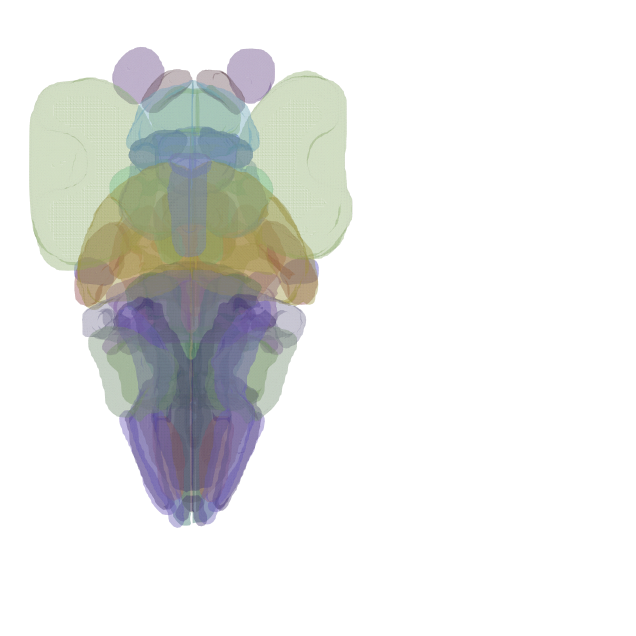

In [105]:


# Iterate Brain Region and create an accurate representation of Zebra fish morphology
# layed on top of a wireframe of the brain projected in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.imshow(bg_image, extent=[left, right, bottom, top])

import random

def random_color():
  return "#{:06x}".format(random.randint(0, 0xFFFFFF))

import numpy as np
from stl import mesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.ndimage import zoom

colors_by_abbr = {}

# Plot the surface of the wireframe of the brain as projection to test accuracy
# img = bg_image
# Set the grid for the image
# x = np.linspace(12, 558, img.shape[1])
# y = np.linspace(30, 1024, img.shape[0])
# x, y = np.meshgrid(x, y)
# z = np.zeros_like(x)  # Z should be a 2D array with the same shape as X and Y

# all_scales = [x.flatten(), y.flatten(), z.flatten()]
# ax.plot_surface(x, y, z, facecolors=img, rstride=1, cstride=1, antialiased=False)

# Function to plot a 3D mesh
def plot_stl(idx, mesh, abbr, opacity, region_color):
    # Load STL file
    all_scales.extend([mesh.x.flatten(), mesh.y.flatten(), mesh.z.flatten()])
    
    if region_color:
      color = region_color
    elif abbr in colors_by_abbr:
      color = colors_by_abbr[abbr]
    else:
      color = random_color()
      colors_by_abbr[abbr] = color

    # Load the vectors from the STL file
    if opacity is not None:
      currentOpacity = opacity
    else:
      currentOpacity = 0.25

    mesh_collection = Poly3DCollection(mesh.vectors, alpha=currentOpacity, color=color, linewidths=0)
    ax.add_collection3d(mesh_collection)

for i, region in enumerate(brain_regions):
  if region.mesh:
    plot_stl(i, region.mesh, region.abbr.lower(), region.opacity, region.color)
    
scale = np.concatenate(all_scales)
ax.auto_scale_xyz(scale, scale, scale)

    
ax.view_init(elev=90, azim=-90)
ax.set_axis_off()
ax.dist = 5

plt.show()


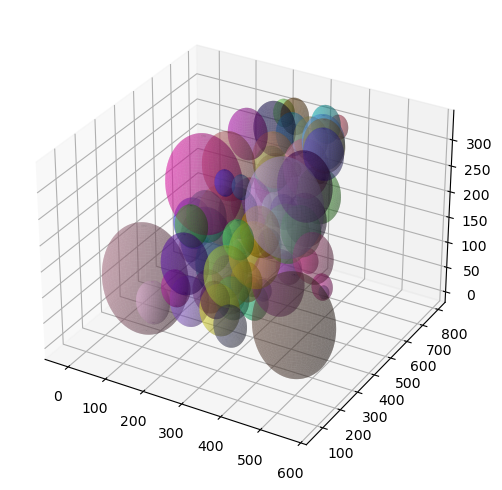

In [15]:
# Plot regions and extended neurons for visualization in 3D - This method is faster than plotting the Mesh of brain regions but
# less accurate
# Iterate Brain Region and create a scatter plots in the form of spheres, also plot on top the neurons soma
fig = figure()
ax = plt.axes(projection='3d')

def calculate_radius(volume):
    # V = 4/3 * π * r^3 => r = (3V / 4π)^(1/3)
    return (3 * volume / (4 * math.pi)) ** (1/3)

# Iterate over brain regions
for region in brain_regions:
    # Calculate the radius of the circle to represent the sphere
    radius = calculate_radius(region.vol)

    phi, theta = np.mgrid[0.0:2.0*np.pi:100j, 0.0:np.pi:50j]
    x = region.x + radius * np.sin(theta) * np.cos(phi)
    y = region.y + radius * np.sin(theta) * np.sin(phi)
    z = region.z + radius * np.cos(theta)

    ax.plot_surface(x, y, z, color=random_color(), alpha=0.35)

plt.show()

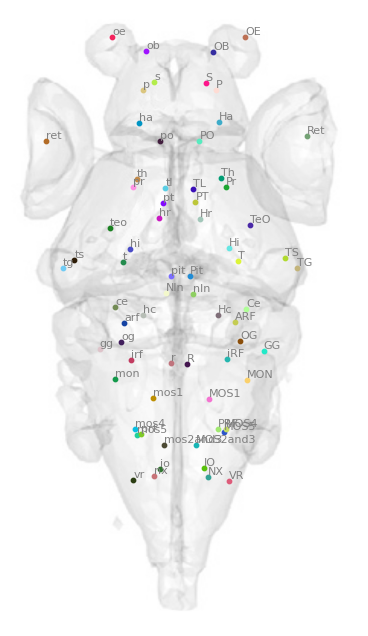

In [16]:
# Plot the regions and abbreviations, at first with random colors, no clusters
fig, ax = figure()
ax.imshow(bg_image, extent=[left, right, bottom, top])

# Iterate over brain regions and plot a small dot at each origin point
for region in brain_regions:
    ax.scatter(region.x, region.y, color=random_color(), s=10)  # s is the size of the dot
    ax.text(region.x, region.y, region.abbr, color='gray', fontsize=8, ha='left', va='bottom')

# Turn off the axes
ax.axis('off')

# Show the plot
plt.show()

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 49.36046552658081, 60.702821493148804, 64.3447916507721, 37.92647838592529, 70.65021800994873, 75.34899711608887, 63.06403589248657, 64.7381774187088, 69.04491937160492, 44.87718605995178, 41.82225227355957, 36.04175066947937, 43.87911081314087, 50.70687961578369, 43.04395890235901, 1.3200483322143555, 19.743059158325195, 28.16566038131714, 23.50088334083557]
[420.5007961988449, 438.8260535001755, 427.91614520549774, 419.5997084379196, 417.1531249284744, 417.57994973659515, 412.4337376356125, 402.8837516307831, 394.33859515190125, 540.6516206264496, 541.3526465892792, 531.8148620128632, 535.3403992652893, 514.7214684486389, 557.5820293426514, 569.079288482666, 544.5351467132568, 550.1892666816711, 539.8445949554443, 494.92365455627

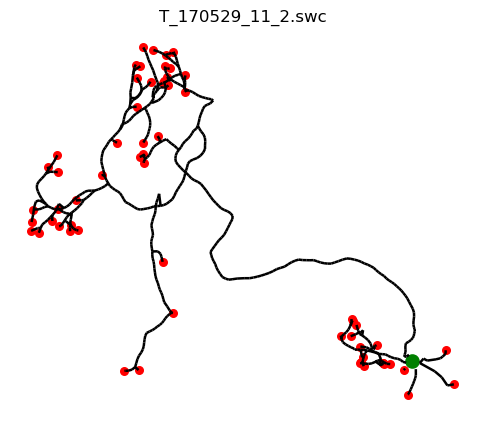

In [17]:
# This part figures out terminals and terminals length, it calculates terminals length and then
# checks the neurom terminal lengths to see if they match and we can use that
fig, ax = figure()


from neurom import NeuriteType
from scipy.spatial.distance import euclidean
from neurom.features.neurite import terminal_path_lengths

# Load the morphology
n = np.random.randint(low=0, high=len(neuron_paths))
m = nm.load_morphology(neuron_paths[n])

def is_within_soma_radius(segment_start, soma_center, soma_radius):
    distance_from_soma_center = euclidean(segment_start[:3], soma_center[:3])
    return distance_from_soma_center <= soma_radius

def accumulate_length(neurite, segment, accumulated_length, target_segment):
    segment_length = euclidean(segment[0][:3], segment[1][:3])
    new_accumulated_length = accumulated_length + segment_length

    # If this is the target segment, return the accumulated length
    if np.array_equal(segment[1][:3], target_segment[1][:3]):
        return new_accumulated_length

    # Check and accumulate length for child segments
    for child_segment in nm.iter_segments(neurite):
        if np.array_equal(segment[1][:3], child_segment[0][:3]):
            # Recursive call to follow the path
            path_length = accumulate_length(neurite, child_segment, new_accumulated_length, target_segment)
            if path_length is not None:
                return path_length

    return None

# compute the path to terminal so we can understand which of the terminal path lengths is the correct one because
# neurom doesn't give us the position of the terminals when calculating paths
def calculate_path_length_to_segment(neurite, soma_center, soma_radius, terminal):
  for segment in nm.iter_segments(neurite):
      if is_within_soma_radius(segment[0][:3], soma_center, soma_radius):
        path_length = accumulate_length(neurite, segment, 0, terminal)
        if path_length is not None:
            return path_length

def find_terminal_points(morphology, skip_terminal_length=True):
    # Collect all start points in a set for quick lookup
    terminals = []
    terminals_length = []
    start_points = {tuple(segment[0][:3]) for neurite in morphology.neurites for segment in nm.iter_segments(neurite)}
    # Find all terminals: if the end of a segment is not in start_points, it's a terminal
    for neurite in morphology.neurites:
      for segment in nm.iter_segments(neurite):
        if tuple(segment[1][:3]) not in start_points: # since it's not part of the start of segment, it ends dead track -> terminal
          terminals.append(segment[1][:3])
          # find the length to that segment
          if not skip_terminal_length:
            path_length = calculate_path_length_to_segment(neurite, morphology.soma.center, morphology.soma.radius, segment)
            terminals_length.append(path_length)

    if skip_terminal_length:
      return terminals
    else:
      return (terminals, terminals_length)

terminals, terminals_length = find_terminal_points(m, False)

plot_morph(m,ax=ax, soma_outline=0, plane='xy', diameter_scale=None, linewidth=1.8, color='k', alpha=1.0)
plt.scatter(m.soma.center[0], m.soma.center[1], s=90, color='g')

path_lengths = []
for neurite in m.neurites:
  path_lengths.extend(terminal_path_lengths(neurite))

# Plot all outputs (axon terminals)
for terminal in terminals:
    plt.scatter(terminal[0], terminal[1], s=30, color='r')  # Plot axon terminals

print(terminals_length)
print(path_lengths)

# by looking at these two arrays we can conclude that the path_lengths has the same order as terminals, so we'll use that instead because it's faster


There is mismatch in terminals and terminals length
There is mismatch in terminals and terminals length
There is mismatch in terminals and terminals length
There is mismatch in terminals and terminals length
There is mismatch in terminals and terminals length
There is mismatch in terminals and terminals length


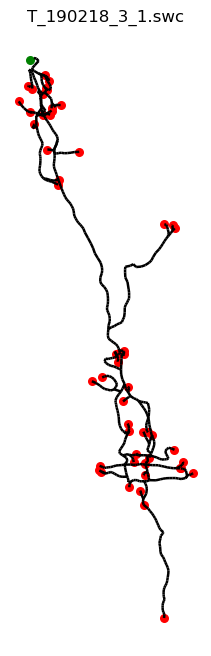

In [18]:
# Compute morphology, terminals, terminals length for all neurons
class ExtendedNeuron:
    def __init__(self, morphology, terminals, terminals_length, soma_center):
        self.morphology = morphology
        self.terminals = terminals
        self.terminals_length = terminals_length
        self.soma_center = soma_center

# Load and process morphologies
augmented_neurons = []
for i, path in enumerate(neuron_paths):
    try:
        morphology = nm.load_morphology(path)  # Load morphology
        terminals = find_terminal_points(morphology)  # Find terminal points

        path_lengths = []
        for neurite in morphology.neurites:
          path_lengths.extend(terminal_path_lengths(neurite))

        if len(terminals) != len(path_lengths):
          print('There is mismatch in terminals and terminals length')

        augmented_neurons.append(ExtendedNeuron(morphology, terminals, path_lengths, morphology.soma.center))  # Create ExtendedNeuron
    except Exception as e:
        print(f"Failed to process neuron {path}: {e}")

# take a specific extended neuron and plot it
n = np.random.randint(low=0, high=len(augmented_neurons))
curr_neuron = augmented_neurons[n]

fig, ax = figure()

plot_morph(curr_neuron.morphology,ax=ax, soma_outline=0, plane='xy', diameter_scale=None, linewidth=1.8, color='k', alpha=1.0)
plt.scatter(curr_neuron.morphology.soma.center[0], curr_neuron.morphology.soma.center[1], s=30, color='g')

for terminal in curr_neuron.terminals:
    plt.scatter(terminal[0], terminal[1], s=30, color='r')  # Plot axon terminals
    
# we ignore the mismatch for now


In [19]:
# Preprocessing step: From the original paper "A cellular-Resolution Atlas of the Larval Zebrafish Brain"
# on the generation of mesoscale connectome we see that the data itself contains only 2% of the brain cells in
# the brain. Since allmost all the neurons in the brain are biletarelly symmetric, double the data set and
# mirror all the neurons.
import copy

all_augmented_neurons = []

def mirror_neuron(neuron, central_axis_x=281.625):
    # Deep copy to create a mirrored version without altering the original
    mirrored_morphology = copy.deepcopy(neuron.morphology)
    mirrored_soma_center = np.array([mirrored_morphology.soma.center[0], mirrored_morphology.soma.center[1],
                            mirrored_morphology.soma.center[2]], dtype="float32")
            
    # Similarly mirror terminal points
    mirrored_terminals = np.array([(2 * central_axis_x - x, y, z) for x, y, z in neuron.terminals], dtype="float32")
    mirrored_soma_center[0] = 2 * central_axis_x - mirrored_soma_center[0]

    mirrored_neuron = ExtendedNeuron(mirrored_morphology, mirrored_terminals, neuron.terminals_length, mirrored_soma_center)
    
    return mirrored_neuron

# Assume augmented_neurons is populated with your original neurons
all_augmented_neurons = []

for neuron in augmented_neurons:
    # Add the original neuron
    all_augmented_neurons.append(neuron)
    
    # Create and add the mirrored neuron
    mirrored_neuron = mirror_neuron(neuron, central_axis_x=281.625)
    all_augmented_neurons.append(mirrored_neuron)
    
    
print(len(augmented_neurons))
print(len(all_augmented_neurons))


3175
6350


In [20]:
# check mirroring works fine / visual inspection
print(all_augmented_neurons[0].terminals)
print(all_augmented_neurons[1].terminals)

[array([223.74763, 743.6374 , 235.68178], dtype=float32), array([227.70453, 737.093  , 228.73195], dtype=float32), array([282.3108 , 741.36206, 206.36487], dtype=float32), array([271.34097, 735.83813, 209.83217], dtype=float32), array([290.5728 , 729.69696, 220.0838 ], dtype=float32), array([279.65195, 730.5728 , 216.71788], dtype=float32), array([285.9843 , 756.0486 , 206.43898], dtype=float32), array([293.47412, 752.178  , 207.2121 ], dtype=float32), array([281.27322, 753.0951 , 207.01097], dtype=float32), array([229.63416, 773.00354, 233.72342], dtype=float32), array([245.15411, 864.4936 , 263.6032 ], dtype=float32), array([246.95572, 850.64417, 259.18658], dtype=float32), array([246.78445, 828.0114 , 251.63564], dtype=float32), array([222.56409, 756.655  , 233.7422 ], dtype=float32), array([216.39145, 736.26263, 233.1673 ], dtype=float32), array([207.94743, 659.7225 , 189.98776], dtype=float32), array([198.78734, 628.0675 , 182.3732 ], dtype=float32), array([184.33351, 568.4005 , 1

In [106]:
# Plot connectivity matrix based on sphere 3D approximation (not brain region mesh), this should go faster
# but it will be less accurate

connectivityMatrixLessAccurate = np.zeros((len(brain_regions), len(brain_regions)))

import pyvista as pv

def is_point_in_sphere(center, point, radius):
    # Unpack the center and point coordinates
    x_c, y_c, z_c = center
    x_p, y_p, z_p = point

    # Calculate the Euclidean distance between the center of the sphere and the point
    distance = math.sqrt((x_p - x_c)**2 + (y_p - y_c)**2 + (z_p - z_c)**2)

    # Check if the distance is less than or equal to the radius
    return distance <= radius

def find_region_for_neuron(curr_neuron, curr_brain_regions):
  for reg in curr_brain_regions:
    radius = calculate_radius(reg.vol)
    if is_point_in_sphere((reg.x, reg.y, reg.z), (curr_neuron[0], curr_neuron[1], curr_neuron[2]), radius):
      return reg
    
umThreshold = 10

# for each soma
for neuronIdx, neuron in enumerate(all_augmented_neurons):
  # if neuronIdx > howMuch:
  #   break
  # find in what brain region does this soma fall into
  region = find_region_for_neuron(neuron.soma_center, brain_regions)
  if region:
    # for every output, find all the regions it connects to
    for i, terminal in enumerate(neuron.terminals):
      connected_region = find_region_for_neuron([terminal[0], terminal[1], terminal[2]], brain_regions)
      if connected_region and neuron.terminals_length[i] and neuron.terminals_length[i] > umThreshold:
        connectivityMatrixLessAccurate[region.idx][connected_region.idx] += neuron.terminals_length[i]

# normalize by the total brain volume of regions
for i in range(len(brain_regions)):
  for j in range(len(brain_regions)):
    total_volume = brain_regions[i].vol + brain_regions[j].vol
    if total_volume > 0:
        connectivityMatrixLessAccurate[i, j] = connectivityMatrixLessAccurate[i, j] / total_volume
    else:
        connectivityMatrixLessAccurate[i, j] = 0

In [21]:
# Calculate better connectivity matrix than the previous one based on actual brain region volumes
# Identify all the connections between differents regions and create a strength map where the strength is composed of all neurites length

# WARNING! This cell takes about 3h for 6k neurons since it checks if every point is in mesh, use 3D sphere approximation for faster time
connectivityMatrix = np.zeros((len(brain_regions), len(brain_regions)))

import pyvista as pv

def is_point_in_region(mesh, meshUrl, point):
    # Unpack the point coordinates
    x_p, y_p, z_p = point
    
    # Define your points (L_Habenula and R_Habenula)
    points = [[x_p, y_p, z_p]]

    # Create a PolyData object for the points
    points_poly = pv.PolyData(points)
    # Use select_enclosed_points to determine if the points are inside the mesh
    select = points_poly.select_enclosed_points(mesh)
    inside = select['SelectedPoints']

    return inside[0]

def find_region_for_neuron(curr_neuron, curr_brain_regions):
  for reg in curr_brain_regions:
    if is_point_in_region(reg.pv_mesh, reg.meshFilename, (curr_neuron[0], curr_neuron[1], curr_neuron[2])):
      return reg

umThreshold = 10

# for each soma
for neuronIdx, neuron in enumerate(all_augmented_neurons):
  # if neuronIdx > howMuch:
  #   break
  # find in what brain region does this soma fall into
  region = find_region_for_neuron(neuron.soma_center, brain_regions)
  if region:
    # for every output, find all the regions it connects to
    for i, terminal in enumerate(neuron.terminals):
      connected_region = find_region_for_neuron([terminal[0], terminal[1], terminal[2]], brain_regions)
      if connected_region and neuron.terminals_length[i] and neuron.terminals_length[i] > umThreshold:
        connectivityMatrix[region.idx][connected_region.idx] += neuron.terminals_length[i]

# normalize by the total brain volume of regions
for i in range(len(brain_regions)):
  for j in range(len(brain_regions)):
    total_volume = brain_regions[i].meshVolume + brain_regions[j].meshVolume
    if total_volume > 0:
        connectivityMatrix[i, j] = connectivityMatrix[i, j] / total_volume
    else:
        connectivityMatrix[i, j] = 0

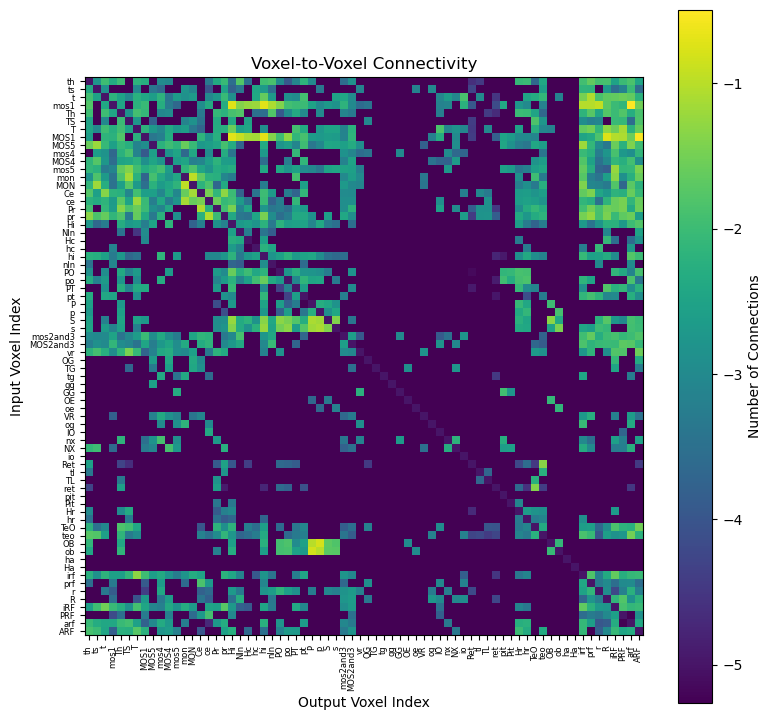

In [81]:
# Plot the connectivity matrix and regions abbr
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(9, 9))

# processing for accurate connectivity matrix
connectivityMatrix[connectivityMatrix <= 0] = np.min(connectivityMatrix[connectivityMatrix > 0])
log_connectivityMatrix = np.log10(connectivityMatrix)

# processing for less accurate based on volume spheres
# connectivityMatrixLessAccurate[connectivityMatrixLessAccurate <= 0] = np.min(connectivityMatrixLessAccurate[connectivityMatrixLessAccurate > 0])
# log_connectivityMatrix = np.log10(connectivityMatrixLessAccurate)

for i in range(len(log_connectivityMatrix)):
  for j in range(len(log_connectivityMatrix)):
    if i == j:
      log_connectivityMatrix[i][j] = -5

# Create the heatmap
cax = ax.imshow(log_connectivityMatrix, interpolation='nearest')


# Add a color bar
cbar = fig.colorbar(cax)
cbar.set_label('Number of Connections')

# Add labels and title (optional)
ax.set_xlabel('Output Voxel Index')
ax.set_ylabel('Input Voxel Index')
ax.set_title('Voxel-to-Voxel Connectivity')

# get brain_region_abbreviations
brain_region_abbreviations = []
for region in brain_regions:
  brain_region_abbreviations.append(region.abbr)

ax.set_xticks(np.arange(len(brain_region_abbreviations)))
ax.set_yticks(np.arange(len(brain_region_abbreviations)))
ax.set_xticklabels(brain_region_abbreviations, rotation=90, fontsize=6)  # Rotate x labels for better readability
ax.set_yticklabels(brain_region_abbreviations, fontsize=6)

# Show the plot
plt.show()

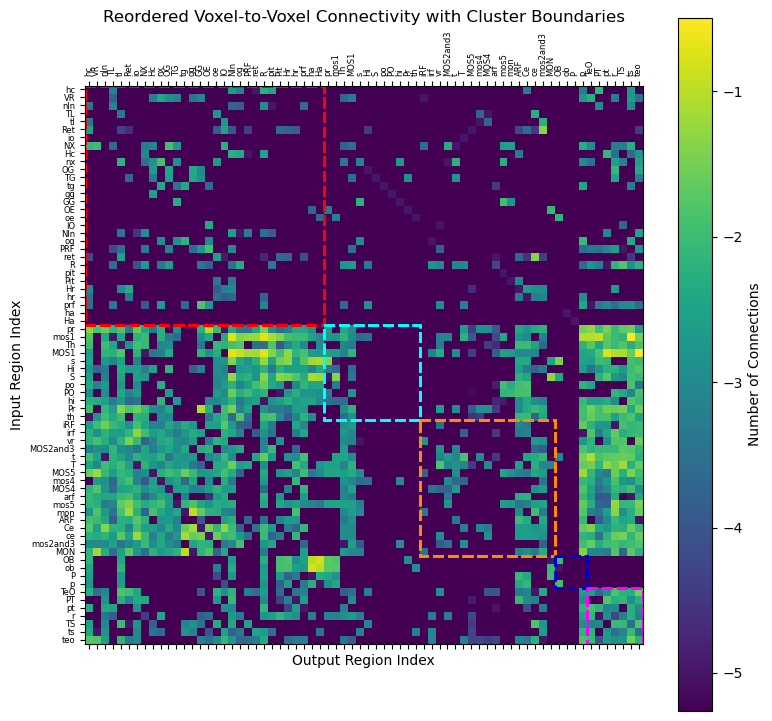

In [103]:
# Perform clustering and show cluster region on top of connectivity map
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

colors = ['red', 'aqua', 'darkorange', 'mediumblue', 'magenta']
region_to_cluster_color = {}

# Apply AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = clustering.fit_predict(log_connectivityMatrix)

# Step 1: Get the sorted order of indices based on cluster labels
sorted_order = np.argsort(cluster_labels)

# Step 2: Reorder your data matrix according to the sorted order
reordered_data = log_connectivityMatrix[sorted_order]

# Step 3: Also reorder the cluster_labels to reflect the new order of the data
reordered_labels = cluster_labels[sorted_order]

# Plot the reordered connectivity matrix
fig, ax = plt.subplots(figsize=(9, 9))
cax = ax.matshow(reordered_data, interpolation='nearest')


brain_region_abbreviations = np.array(brain_region_abbreviations)
reordered_brain_region_abbreviations = brain_region_abbreviations[sorted_order]

for i, label in enumerate(reordered_labels):
    indices = np.where(reordered_labels == label)[0]
    if indices.size > 0:
        # Calculate the start and end indices of the cluster
        start_idx, end_idx = indices[0], indices[-1]
        cluster_size = end_idx - start_idx + 1
        
        color = colors[label] if label < len(colors) else 'red'
        region_to_cluster_color[reordered_brain_region_abbreviations[i]] = color

        # Draw rectangles around clusters
        rect = plt.Rectangle((start_idx-0.5, start_idx-0.5), cluster_size, cluster_size,
                            edgecolor=color, fill=False, linestyle='--', linewidth=2)
        ax.add_patch(rect)

# Add color bar
cbar = fig.colorbar(cax)
cbar.set_label('Number of Connections')

# Add labels
ax.set_xticks(np.arange(len(reordered_brain_region_abbreviations)))
ax.set_yticks(np.arange(len(reordered_brain_region_abbreviations)))
ax.set_xticklabels(reordered_brain_region_abbreviations, rotation=90, fontsize=6)
ax.set_yticklabels(reordered_brain_region_abbreviations, fontsize=6)

# Title and labels
ax.set_xlabel('Output Region Index')
ax.set_ylabel('Input Region Index')
ax.set_title('Reordered Voxel-to-Voxel Connectivity with Cluster Boundaries')

plt.show()

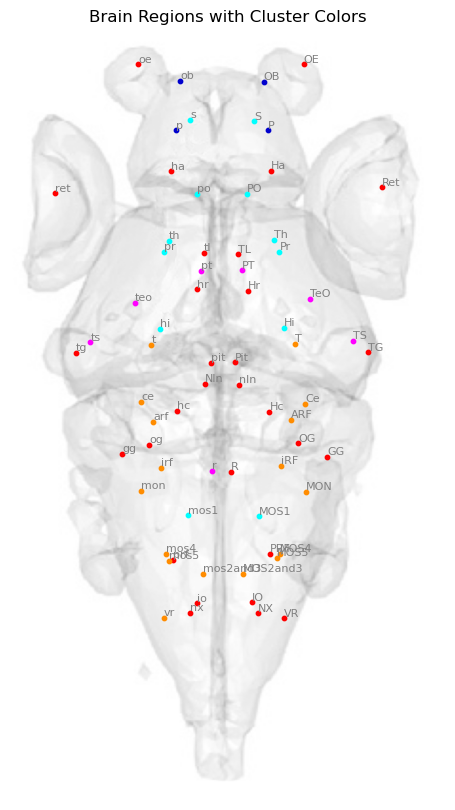

In [101]:
# Plot brain regions given the clustering groups
# Now create the plot for brain regions
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(bg_image, extent=[left, right, bottom, top])  # Assuming bg_image is defined

# Step 1: Create a mapping from abbreviations to BrainRegion objects
abbr_to_brain_region = {region.abbr: region for region in brain_regions}

# Step 2: Create a new ordered list of BrainRegion objects
ordered_brain_regions = [abbr_to_brain_region[abbr] for abbr in reordered_brain_region_abbreviations]

# Iterate over brain regions
for region in ordered_brain_regions:
    # Use the region index to get the corresponding cluster color
    region_color = region_to_cluster_color[region.abbr]
    ax.scatter(region.x, region.y, color=region_color, s=10)  # Plot the region
    ax.text(region.x, region.y, region.abbr, color='gray', fontsize=8, ha='left', va='bottom')  # Annotate with abbreviation

# Turn off the axis
ax.axis('off')
plt.title('Brain Regions with Cluster Colors')
plt.show()

In [ ]:
# Conclusions:
# The connection in the connectivity matrix from Tectum (teo) to Torus Semircircularis (ts) to Posterior Tuberculum (pt)
# might be interpreted as a connection between multisensory integration (Tectum and Torus Semicircularis) and Posterior
# Tuberculum as behavioral modulation where the sensory information from the previous group modulates the animal behavior
# and neuroendocrine regulation.

In [ ]:
# That's it. Conclusion about clusterings can be found in A Cellular-Resolution Atlas of the Larval Zebrafish Brain